#### https://datahack.analyticsvidhya.com/contest/black-friday/#LeaderBoard

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Anoop\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Reading in the data

df = pd.read_csv("train.csv")

### High Level Analysis

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### Checking Null Values

In [7]:
na_percentage = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)

print(na_percentage)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64


### Null Correction

In [8]:
# First we try filling the null values in the dataset with 0

df.fillna(0, inplace = True)

### Label Encoding and One Hot Encoding

In [9]:
# Feature with ranking or more number of unique values
# df.describe(include = ['O'])
# df.describe()
# type(df['User_ID'][0])
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df['Product_ID'] = la.fit_transform(df['Product_ID'])
# df.describe(include = ['O'])
# df['Stay_In_Current_City_Years'].unique()
# df['Age'].unique()
# df['Gender'].unique()
# -> Gender -> Age -> City_category -> Stay_In_Current_City_Years
df['Gender'] = np.where(df['Gender'] == 'M', 1, 0) # Female:0, Male:1
# df_Age = pd.get_dummies(df.age)
# df = pd.concat([df, df_age], axis = 1)
# df.drop("Age", axis = 'columns', inplace = True)
df = pd.get_dummies(df)
df
# cols = ['City_category', 'Stay_In_Current_City_Years']
# df = pd.get_dummies(df, columns = cols, prefix = cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   User_ID                        550068 non-null  int64  
 1   Product_ID                     550068 non-null  int32  
 2   Gender                         550068 non-null  int32  
 3   Occupation                     550068 non-null  int64  
 4   Marital_Status                 550068 non-null  int64  
 5   Product_Category_1             550068 non-null  int64  
 6   Product_Category_2             550068 non-null  float64
 7   Product_Category_3             550068 non-null  float64
 8   Purchase                       550068 non-null  int64  
 9   Age_0-17                       550068 non-null  uint8  
 10  Age_18-25                      550068 non-null  uint8  
 11  Age_26-35                      550068 non-null  uint8  
 12  Age_36-45                     

In [10]:
df.head()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,672,0,10,0,3,0.0,0.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,1000001,2376,0,10,0,1,6.0,14.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,1000001,852,0,10,0,12,0.0,0.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,1000001,828,0,10,0,12,14.0,0.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,1000002,2734,1,16,0,8,0.0,0.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


### Feature Engineering by correlation heatmap, plot, describe, random select etc.

In [11]:
import seaborn as sns

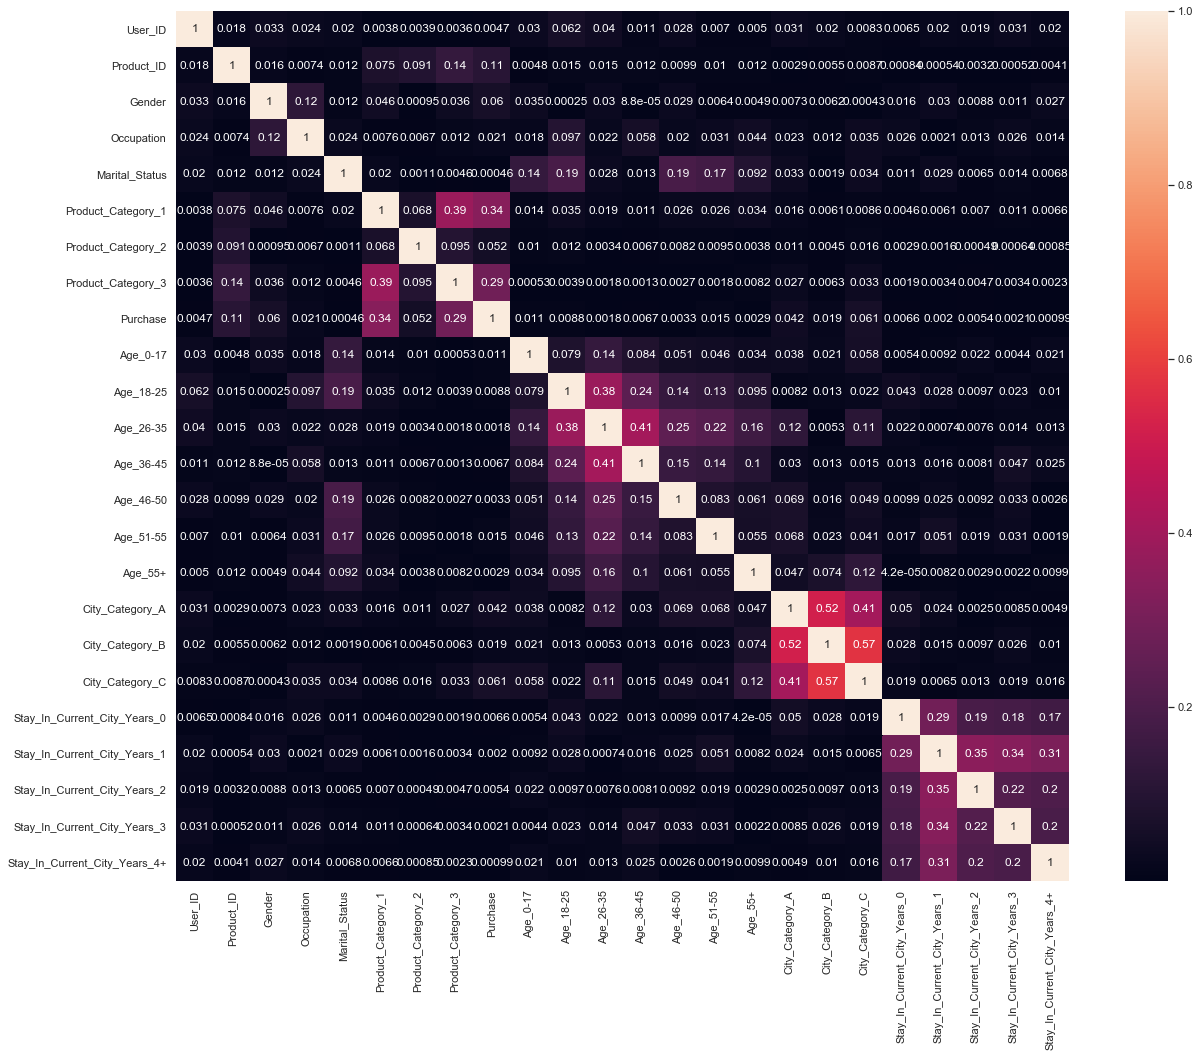

In [12]:
corr = df.corr() # I create an object with the correlation values
corr = np.abs(corr) # Now I take the absolute value of the corr object since all values or correlation are important for analysis
sns.set(rc = {'figure.figsize': (20, 16)})
hm = sns.heatmap(corr, annot = True)
hm

In [13]:
# Another way to see the correlation of purchase with other features is to do the below step
corr['Purchase'].sort_values()

Marital_Status                   0.000463
Stay_In_Current_City_Years_4+    0.000988
Age_26-35                        0.001830
Stay_In_Current_City_Years_1     0.002030
Stay_In_Current_City_Years_3     0.002090
Age_55+                          0.002904
Age_46-50                        0.003317
User_ID                          0.004716
Stay_In_Current_City_Years_2     0.005358
Stay_In_Current_City_Years_0     0.006605
Age_36-45                        0.006707
Age_18-25                        0.008831
Age_0-17                         0.011055
Age_51-55                        0.014792
City_Category_B                  0.019098
Occupation                       0.020833
City_Category_A                  0.042465
Product_Category_2               0.052288
Gender                           0.060346
City_Category_C                  0.061012
Product_ID                       0.109345
Product_Category_3               0.288501
Product_Category_1               0.343703
Purchase                         1

### Separate X and y

In [14]:
X = df.drop(['Purchase'], axis = 1)
y = df['Purchase']

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Scaling

In [16]:
# If the features are in different ranges (example 1 to 1000 and 100000000 to 200000000), 
# then the ML algorithm will take a lot of time to find an optimal solution
# or the algorithm may give out a completely wrong output. Therefore, it is ideal to have all the features in the same range.

df.describe()

,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_0-17,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,...,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,1707.473323,0.753105,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713,0.027455,...,0.069993,0.039093,0.268549,0.420263,0.311189,0.135252,0.352358,0.185137,0.173224,0.154028
std,1.727592e+03,1012.201109,0.431205,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394,0.163405,...,0.255136,0.193817,0.443205,0.493601,0.462980,0.341993,0.477705,0.388409,0.378441,0.360976
min,1.000001e+06,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.001516e+06,930.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.003077e+06,1666.000000,1.000000,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.004478e+06,2550.000000,1.000000,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.006040e+06,3630.000000,1.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaler = sc.fit(X) # We will fit on X
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Baseline Model

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7018334483788942

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV




n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
rf_random.fit(X_train, y_train)

### Testing the Model

In [ ]:
model = rf_random.best_estimator_
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(y_test[:10])
print(model.predict(X_test[:10]))